In [1]:
import pandas as pd
import yfinance as yf
from fredapi import Fred
import seaborn as sns
import matplotlib.pyplot as plt
import functions as fncts

/Users/kruri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Country to be analysed:

In [2]:
country = 'US'

In [3]:
# Set up FRED API key (replace with your own key)
FRED_API_KEY = '5e1b77fb31cb71e49f953e47abdf8a4a'
fred = Fred(api_key=FRED_API_KEY)

/Users/kruri/Desktop/TRDS/Models/functions.py:30: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  series_data_yearly = series_data.resample('Y').mean()


            interest_rate         cpi        pci          GDP
2005-12-31       3.213333  195.266667  82.127333  13039.19700
2006-12-31       4.964167  201.558333  84.439917  13815.58300
2007-12-31       5.019167  207.344167  86.606667  14474.22700
2008-12-31       1.927500  215.254250  89.169583  14769.86175
2009-12-31       0.160000  214.564667  88.921000  14478.06725


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

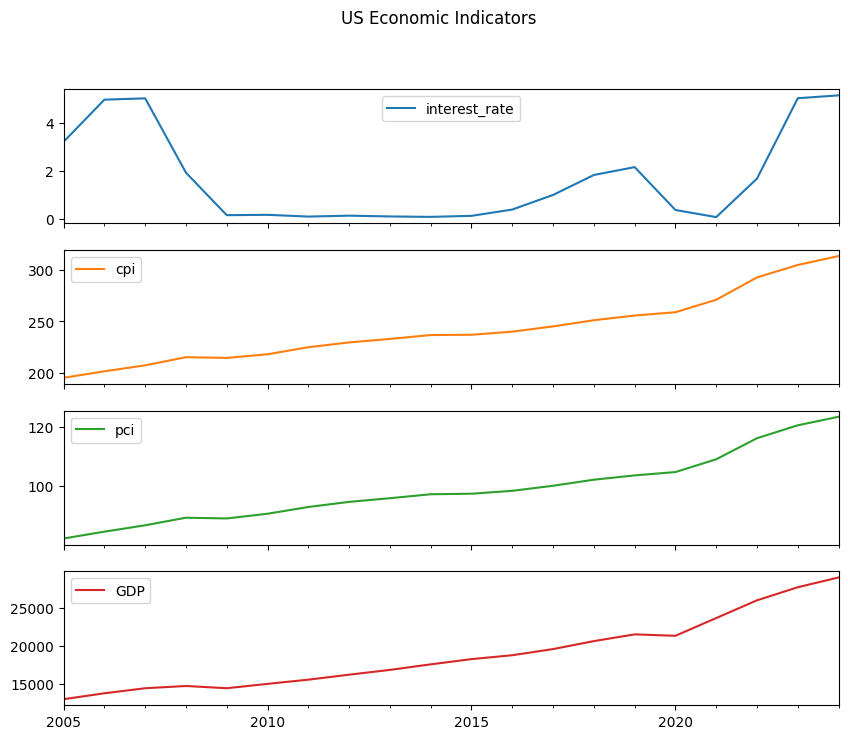

In [4]:
data = fncts.fetch_economic_data_helper(country, fncts.economic_indicators[country], fred)
data = data[data.index >= '2005-01-01']
# Display the first few rows
print(data.head())

# Plot the data (optional)
data.plot(subplots=True, figsize=(10, 8), title=f'{country} Economic Indicators')


Correlation Matrix:
               interest_rate       cpi       pci       GDP
interest_rate       1.000000  0.185314  0.175105  0.237840
cpi                 0.185314  1.000000  0.999852  0.993470
pci                 0.175105  0.999852  1.000000  0.993025
GDP                 0.237840  0.993470  0.993025  1.000000


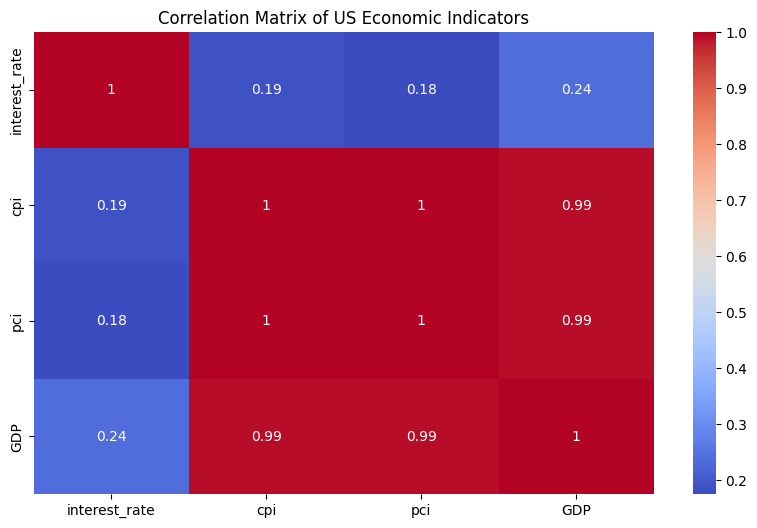

In [5]:
# Correlation Analysis
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix of {country} Economic Indicators')
plt.show()